<a href="https://colab.research.google.com/github/wndnjs2037/2021W_Python-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC(%EB%82%98)_20220222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

In [ ]:
df = pd.read_csv('./seoul1.csv')

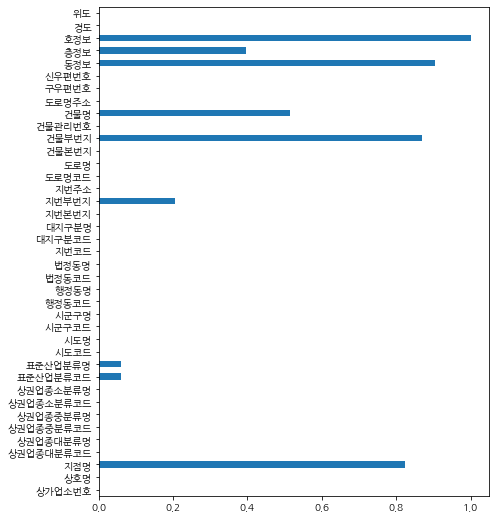

In [ ]:
### 결측치 보기
df.isnull().mean().plot.barh(figsize=(7,9)) #null 값을 가진 데이터 확인하기

In [ ]:
### 사용하지 않는 컬럼 제거
col = ['상호명', '상권업종대분류명', '시군구명' , '경도', '위도','시도명'] #사용할 컬럼만 저장

In [ ]:
df = df[col].copy()
df.shape

(315294, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315294 entries, 0 to 315293
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       315293 non-null  object 
 1   상권업종대분류명  315294 non-null  object 
 2   시군구명      315294 non-null  object 
 3   경도        315294 non-null  float64
 4   위도        315294 non-null  float64
 5   시도명       315294 non-null  object 
dtypes: float64(2), object(4)
memory usage: 14.4+ MB


In [ ]:
### 서울특별시만 가져오기
df['시도명'].unique()

array(['서울특별시'], dtype=object)

In [ ]:
### unique를 사용하여 시군구명을 가져오기
df['시군구명'].unique() #중복된 값을 제거하고 하나씩 가져옴

array(['영등포구', '성동구', '종로구', '송파구', '서초구', '동작구', '강남구', '마포구', '중랑구',
       '은평구', '성북구', '강동구', '양천구', '서대문구', '중구', '광진구', '용산구', '관악구',
       '강서구', '노원구', '강북구', '구로구', '금천구', '도봉구', '동대문구'], dtype=object)

In [ ]:
df['시군구명'].unique().shape #개수 확인 가능

(25,)

In [ ]:
# df = df.drop(['시도명'],  axis=1) #두번 실행하면 오류남

In [ ]:
# 상호명을 소문자로 바꾼 값 저장하기
df['상호명_소문자'] = df['상호명'].str.lower()

In [ ]:
# contains를 사용해서 해당 글자가 있는 row만 가져오기 - 배스킨 베스킨 baskin ...
df['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins').fillna(False) # |로 or 연산 가능
#원하는 행만 True인 시리즈를 만들었다

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0         False
1         False
2         False
3         False
4         False
          ...  
315289    False
315290    False
315291    False
315292    False
315293    False
Name: 상호명_소문자, Length: 315294, dtype: bool

In [ ]:
df.loc[df['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins').fillna(False), '상호명_소문자']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


593          배스킨라빈스공릉점
2249        배스킨라빈스강남중앙
3978          배스킨라빈스31
5219      배스킨라빈스31상봉역점
5461       배스킨라빈스31서초점
              ...     
278096          배스킨라빈스
279201          배스킨라빈스
279648          베스킨라빈스
282130        배스킨라빈스31
312429          배스킨라빈스
Name: 상호명_소문자, Length: 333, dtype: object

In [ ]:
# 던킨 | dunkin
df.loc[df['상호명_소문자'].str.contains('던킨|dunkin').fillna(False), '상호명_소문자'] #fillna를 통해 해당하지 않는 값을 False로 만들어준다

270       던킨도너츠동대문홈플러스
681              던킨도너츠
4781             던킨도너츠
5050             던킨도너츠
10218        던킨도너츠광운대역
              ...     
259443     던킨도너츠올림픽공원점
261871           던킨도너츠
264006           던킨도너츠
267057              던킨
312735              던킨
Name: 상호명_소문자, Length: 101, dtype: object

In [ ]:
# # df 데이터프레임에서 걸러낸 배스킨라빈스 데이터만 가져와서 카피해서 변수에 할당함
df_31 = df[df['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins|').fillna(False)].copy() #copy한 값을 새로 df_31에 저장

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [ ]:
# 던킨과 배스킨 데이터 합치기
df_31 = df[df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins|던킨|dunkin').fillna(False)].copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [ ]:
df_31.loc[df_31['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins'), '브랜드명'] ='배스킨라빈스' #브랜드명이라는 새로운 컬럼 생성해서 처리함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [ ]:
df_31

,상호명,상권업종대분류명,시군구명,경도,위도,시도명,상호명_소문자,브랜드명
270,던킨도너츠동대문홈플러스,음식,동대문구,127.038754,37.574540,서울특별시,던킨도너츠동대문홈플러스,NaN
593,배스킨라빈스공릉점,음식,노원구,127.078586,37.627425,서울특별시,배스킨라빈스공릉점,배스킨라빈스
681,던킨도너츠,음식,중구,126.976613,37.564692,서울특별시,던킨도너츠,NaN
2249,배스킨라빈스강남중앙,음식,강남구,127.027724,37.499852,서울특별시,배스킨라빈스강남중앙,배스킨라빈스
3978,배스킨라빈스31,음식,강서구,126.854800,37.558456,서울특별시,배스킨라빈스31,배스킨라빈스
...,...,...,...,...,...,...,...,...
279201,배스킨라빈스,음식,강남구,127.101316,37.466798,서울특별시,배스킨라빈스,배스킨라빈스
279648,베스킨라빈스,음식,구로구,126.891693,37.489986,서울특별시,베스킨라빈스,배스킨라빈스
282130,배스킨라빈스31,음식,용산구,126.962964,37.539236,서울특별시,배스킨라빈스31,배스킨라빈스
312429,배스킨라빈스,음식,중랑구,127.080110,37.584637,서울특별시,배스킨라빈스,배스킨라빈스


In [ ]:
df_31.loc[~df_31['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins'), '브랜드명'] ='던킨도나쓰' # 해당 조건에 해당되는 것들을 ~으로 반전하여 반대되는 값 저장

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [ ]:
df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠') 

In [ ]:
df_31['브랜드명']

270        던킨도나쓰
593       배스킨라빈스
681        던킨도나쓰
2249      배스킨라빈스
3978      배스킨라빈스
           ...  
279201    배스킨라빈스
279648    배스킨라빈스
282130    배스킨라빈스
312429    배스킨라빈스
312735     던킨도나쓰
Name: 브랜드명, Length: 434, dtype: object

In [ ]:
# 음식점이 아닐수도 있으니~~ 음식점으로 구분하기
df_31['상권업종대분류명'].value_counts()

음식    433
소매      1
Name: 상권업종대분류명, dtype: int64

In [ ]:
df_31[df_31['상권업종대분류명'].isin(['소매'])] #소매인 행 가져오기

,상호명,상권업종대분류명,시군구명,경도,위도,시도명,상호명_소문자,브랜드명
156008,배스킨라빈스,소매,강남구,127.029381,37.527375,서울특별시,배스킨라빈스,배스킨라빈스


In [ ]:
df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매'])].copy()

In [ ]:
df_31['상권업종대분류명'].value_counts()

음식    433
Name: 상권업종대분류명, dtype: int64

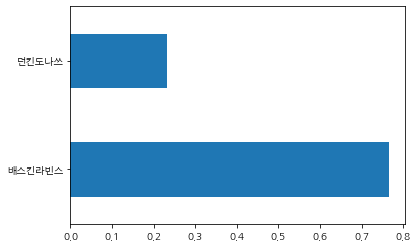

In [ ]:
# normalize로 빈도수 비율 구하기
df_31['브랜드명'].value_counts(normalize=True).plot.barh()

In [ ]:
brand_count = df_31['브랜드명'].value_counts()
brand_count # 시리즈의 인덱스가 배스킨 턴킨으로 구성되어있음

배스킨라빈스    332
던킨도나쓰     101
Name: 브랜드명, dtype: int64

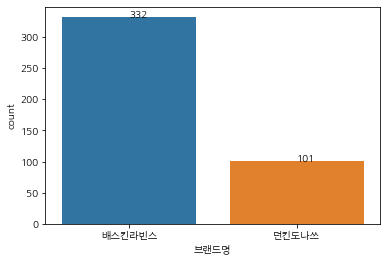

In [ ]:
# countplot 그리기
g = sns.countplot(data=df_31, x='브랜드명', order=brand_count.index)
for i, val in enumerate(brand_count.index):
  g.text(x=i, y=brand_count[i], s=brand_count[i])

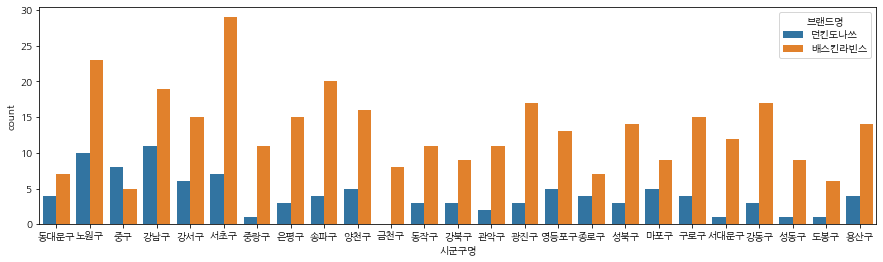

In [ ]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 그리기
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

In [ ]:
table_city_brand = df_31.pivot_table(index='시군구명', columns='브랜드명', values='상호명', aggfunc='count')
table_city_brand

브랜드명,던킨도나쓰,배스킨라빈스
시군구명,,
강남구,11.0,19.0
강동구,3.0,17.0
강북구,3.0,9.0
강서구,6.0,15.0
관악구,2.0,11.0
광진구,3.0,17.0
구로구,4.0,15.0
금천구,NaN,8.0
노원구,10.0,23.0


In [ ]:
# 데이터프레임을 row 순서로 순회하는 방법
for i, val in table_city_brand.iterrows():
  dunkin = val['던킨도나쓰']
  baskin = val['배스킨라빈스']
  print(dunkin, baskin)

11.0 19.0
3.0 17.0
3.0 9.0
6.0 15.0
2.0 11.0
3.0 17.0
4.0 15.0
nan 8.0
10.0 23.0
1.0 6.0
4.0 7.0
3.0 11.0
5.0 9.0
1.0 12.0
7.0 29.0
1.0 9.0
3.0 14.0
4.0 20.0
5.0 16.0
5.0 13.0
4.0 14.0
3.0 15.0
4.0 7.0
8.0 5.0
1.0 11.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


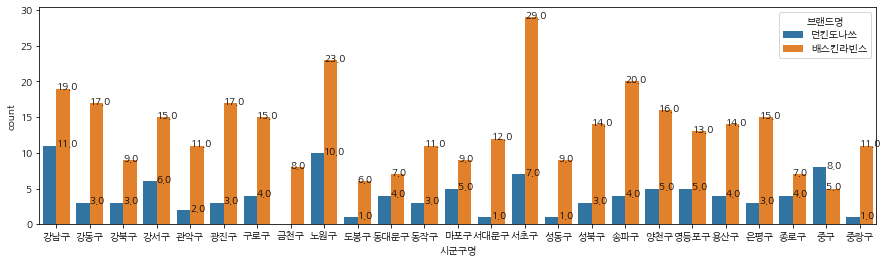

In [ ]:
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x='시군구명', hue='브랜드명', order=table_city_brand.index)

index_no=0
for city, val in table_city_brand.iterrows():
  dunkin = val['던킨도나쓰']
  baskin = val['배스킨라빈스']
  g.text(x=index_no, y=dunkin, s = dunkin)
  g.text(x=index_no, y=baskin, s = baskin)
  index_no+=1
  

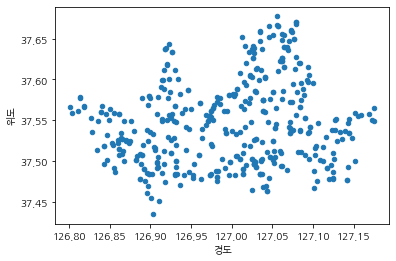

In [ ]:
### scatterplot
df_31[['위도', '경도']].plot.scatter(x='경도', y='위도')

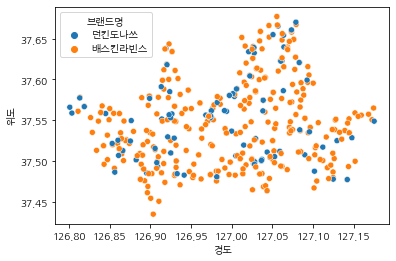

In [ ]:
# seaborn의 scatterplot으로 hue에 브랜드명을 지정해서 시각화하기
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

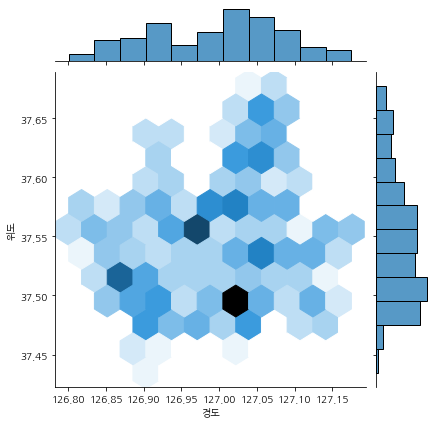

In [ ]:
# jointplot kind = 'hex'
sns.jointplot(data=df_31, x='경도', y='위도', kind='hex')

In [ ]:
### 지도그리깅